# Baseline Model

### Data Distribution

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline

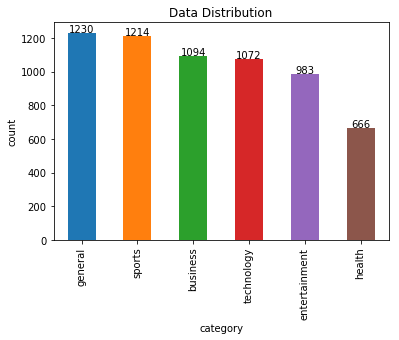

In [2]:
import json
import sys

news_store = list()
with open('./news_baseline.json','r',encoding="utf8") as f :
    ls = f.readlines()
    for l in ls:
        news = json.loads(l)
        #combine sci with tech 
        if(news['category']=="science"):
            news['category']="technology"
        # combine title and description
        # to-dos
        news_store.append(news)

news_store = pd.DataFrame(news_store)
news_store.drop('_id', axis=1, inplace=True)
 
ax =  news_store['category'].value_counts().plot(kind='bar')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,
            height + 4,
            '{:1.0f}'.format(height),
            ha="center") 
plt.title('Data Distribution')
plt.xlabel('category')
plt.ylabel('count')
plt.show()

### Tf-Idf + Logistic Regression

In [3]:
# prepare training and testing data
data = news_store.sample(frac=1.0)
test_num = int(0.2 * data.shape[0]) # 20% percent of test data
data_test = data[:test_num]
data_train = data[test_num:]
X_test_raw = data_test['description']
Y_test = data_test['category']
X_train_raw = data_train['description']
Y_train = data_train['category']
print('Test data num: {}\nTraining data num: {}'.format(test_num,data.shape[0]-test_num))

Test data num: 1251
Training data num: 5008


In [12]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.svm import NuSVC
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_fscore_support

vectorizer = TfidfVectorizer(stop_words='english', analyzer='word', ngram_range=(1,1))
clf = LogisticRegression(max_iter=400)
#clf = SVC()
#clf = LinearSVC()
#clf = NuSVC(kernel='linear')
#clf = MultinomialNB(fit_prior=False)

X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)

precision, recall, fscore, _ = precision_recall_fscore_support(Y_test, Y_pred, average='macro')
print('========Performance========')
print('score: {:.4f}'.format(clf.score(X_test,Y_test)))

print('Precision: {:.4f}, Recall:{:.4f}, F-1 Score: {:.4f}.'.format(precision, recall, fscore))
print('===========================')

========Performance========
score: 0.6635
Precision: 0.6609, Recall:0.6535, F-1 Score: 0.6553.


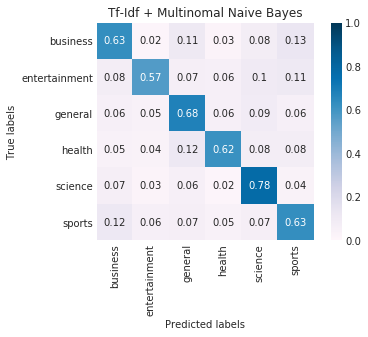

In [14]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

categories = ['business','entertainment','general','health',
            'science', 'sports']
con_mat = confusion_matrix(Y_test,Y_pred).astype(np.float)
for i,row in enumerate(con_mat):
    row = row / float(sum(row))
    con_mat[i] = row.round(2)

with sns.axes_style("white"):
    ax = sns.heatmap(con_mat, vmax=1, vmin=0 ,square=True, xticklabels=categories,
                     yticklabels=categories,cmap="PuBu",annot =True)

plt.title("Tf-Idf + Multinomal Naive Bayes")
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()